In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_37712\3064471974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

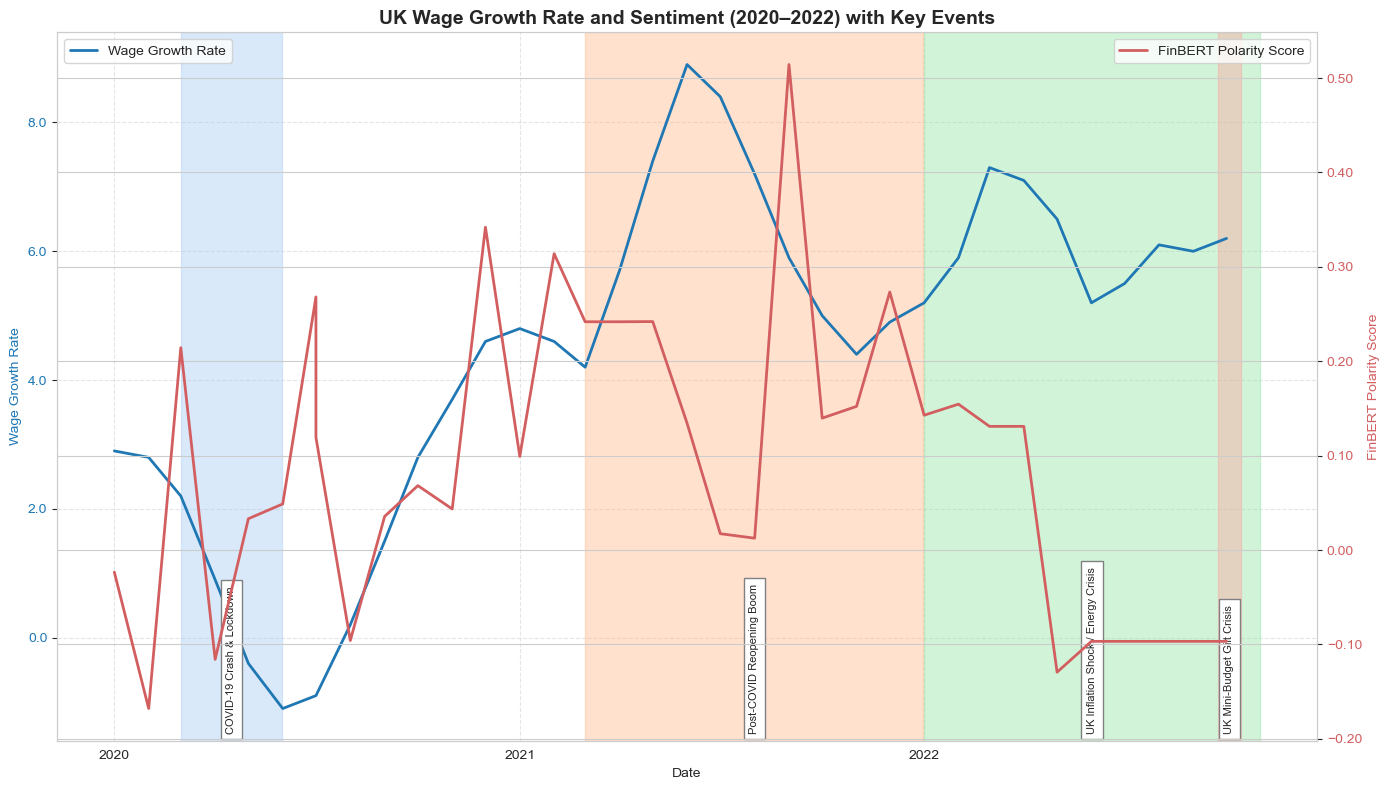

In [6]:
# Filter the dataset
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()

# Drop missing values
df_plot = df_plot.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'])

# Define economic events (filtered to relevant period)
events = {
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plotting setup
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Primary axis: wage growth
color_wage = '#1F77B4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_wage, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_wage, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_wage)

# Secondary axis: sentiment
ax2 = ax1.twinx()
color_sent = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sent, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sent, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sent)

# Shade economic events
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
for i, (event_name, dates) in enumerate(events.items()):
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    display_start = max(start, start_date)
    display_end = min(end, end_date)
    if display_start <= display_end:
        ax1.axvspan(display_start, display_end, color=event_colors[i], alpha=0.4)
        label_y = ax1.get_ylim()[0] + 0.01 * (ax1.get_ylim()[1] - ax1.get_ylim()[0])
        label_x = display_start + (display_end - display_start) / 2
        ax1.text(label_x, label_y, event_name, rotation=90, fontsize=8,
                 ha='center', va='bottom',
                 bbox=dict(facecolor='white', alpha=1, edgecolor='gray'))

# Axis and legend formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

plt.title('UK Wage Growth Rate and Sentiment (2020–2022) with Key Events', fontsize=14, fontweight='bold')
fig.tight_layout()

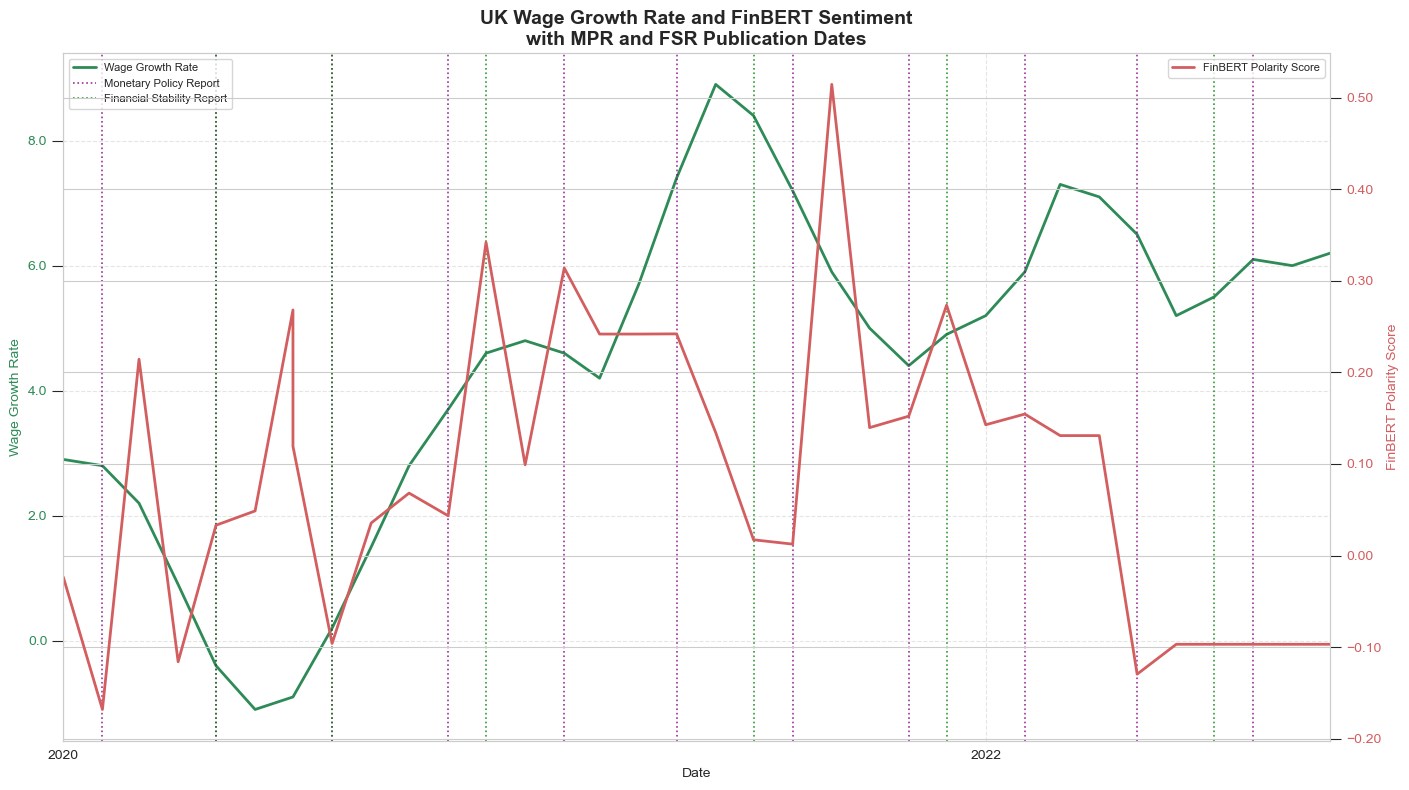

In [7]:
# Ensure your DataFrame is already loaded and called df_uk_2020_2022

start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_conf, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_conf, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)


# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Wage Growth Rate and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

#### Drop unncessary columns to reduce the number of variables to be explored

In [9]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [10]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [11]:
# Ensure 'Date' is in datetime format
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])

# Filter data to start from 1 March 2001
df_uk_focused = df_uk_focused[df_uk_focused['Date'] >= '2001-03-01'].copy()

# Define the new column order
new_column_order = [
    'Date', 'wage_growth_rate', 'confidence_score', 'finbert_sentiment_score',
    'CPI_pct_change', 'unemployment_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reorder the DataFrame columns
df_uk_focused = df_uk_focused[new_column_order]

# Display the first few rows
df_uk_focused.head()

,Date,wage_growth_rate,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
136,2001-03-01,6.1,3.0,0.191264,0.9,5.0,0.4,2802.949951,5.625000,119.314
137,2001-04-01,6.2,1.0,0.229204,1.2,4.9,0.4,2958.949951,5.500000,119.809
138,2001-05-01,5.1,2.0,-0.143061,1.7,5.0,0.4,3044.310059,5.250000,120.240
139,2001-06-01,5.5,6.0,-0.173690,1.7,5.0,0.5,2925.889893,5.166667,120.458
140,2001-07-01,5.2,4.0,0.439598,1.4,5.1,0.5,2830.649902,5.083333,121.387


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

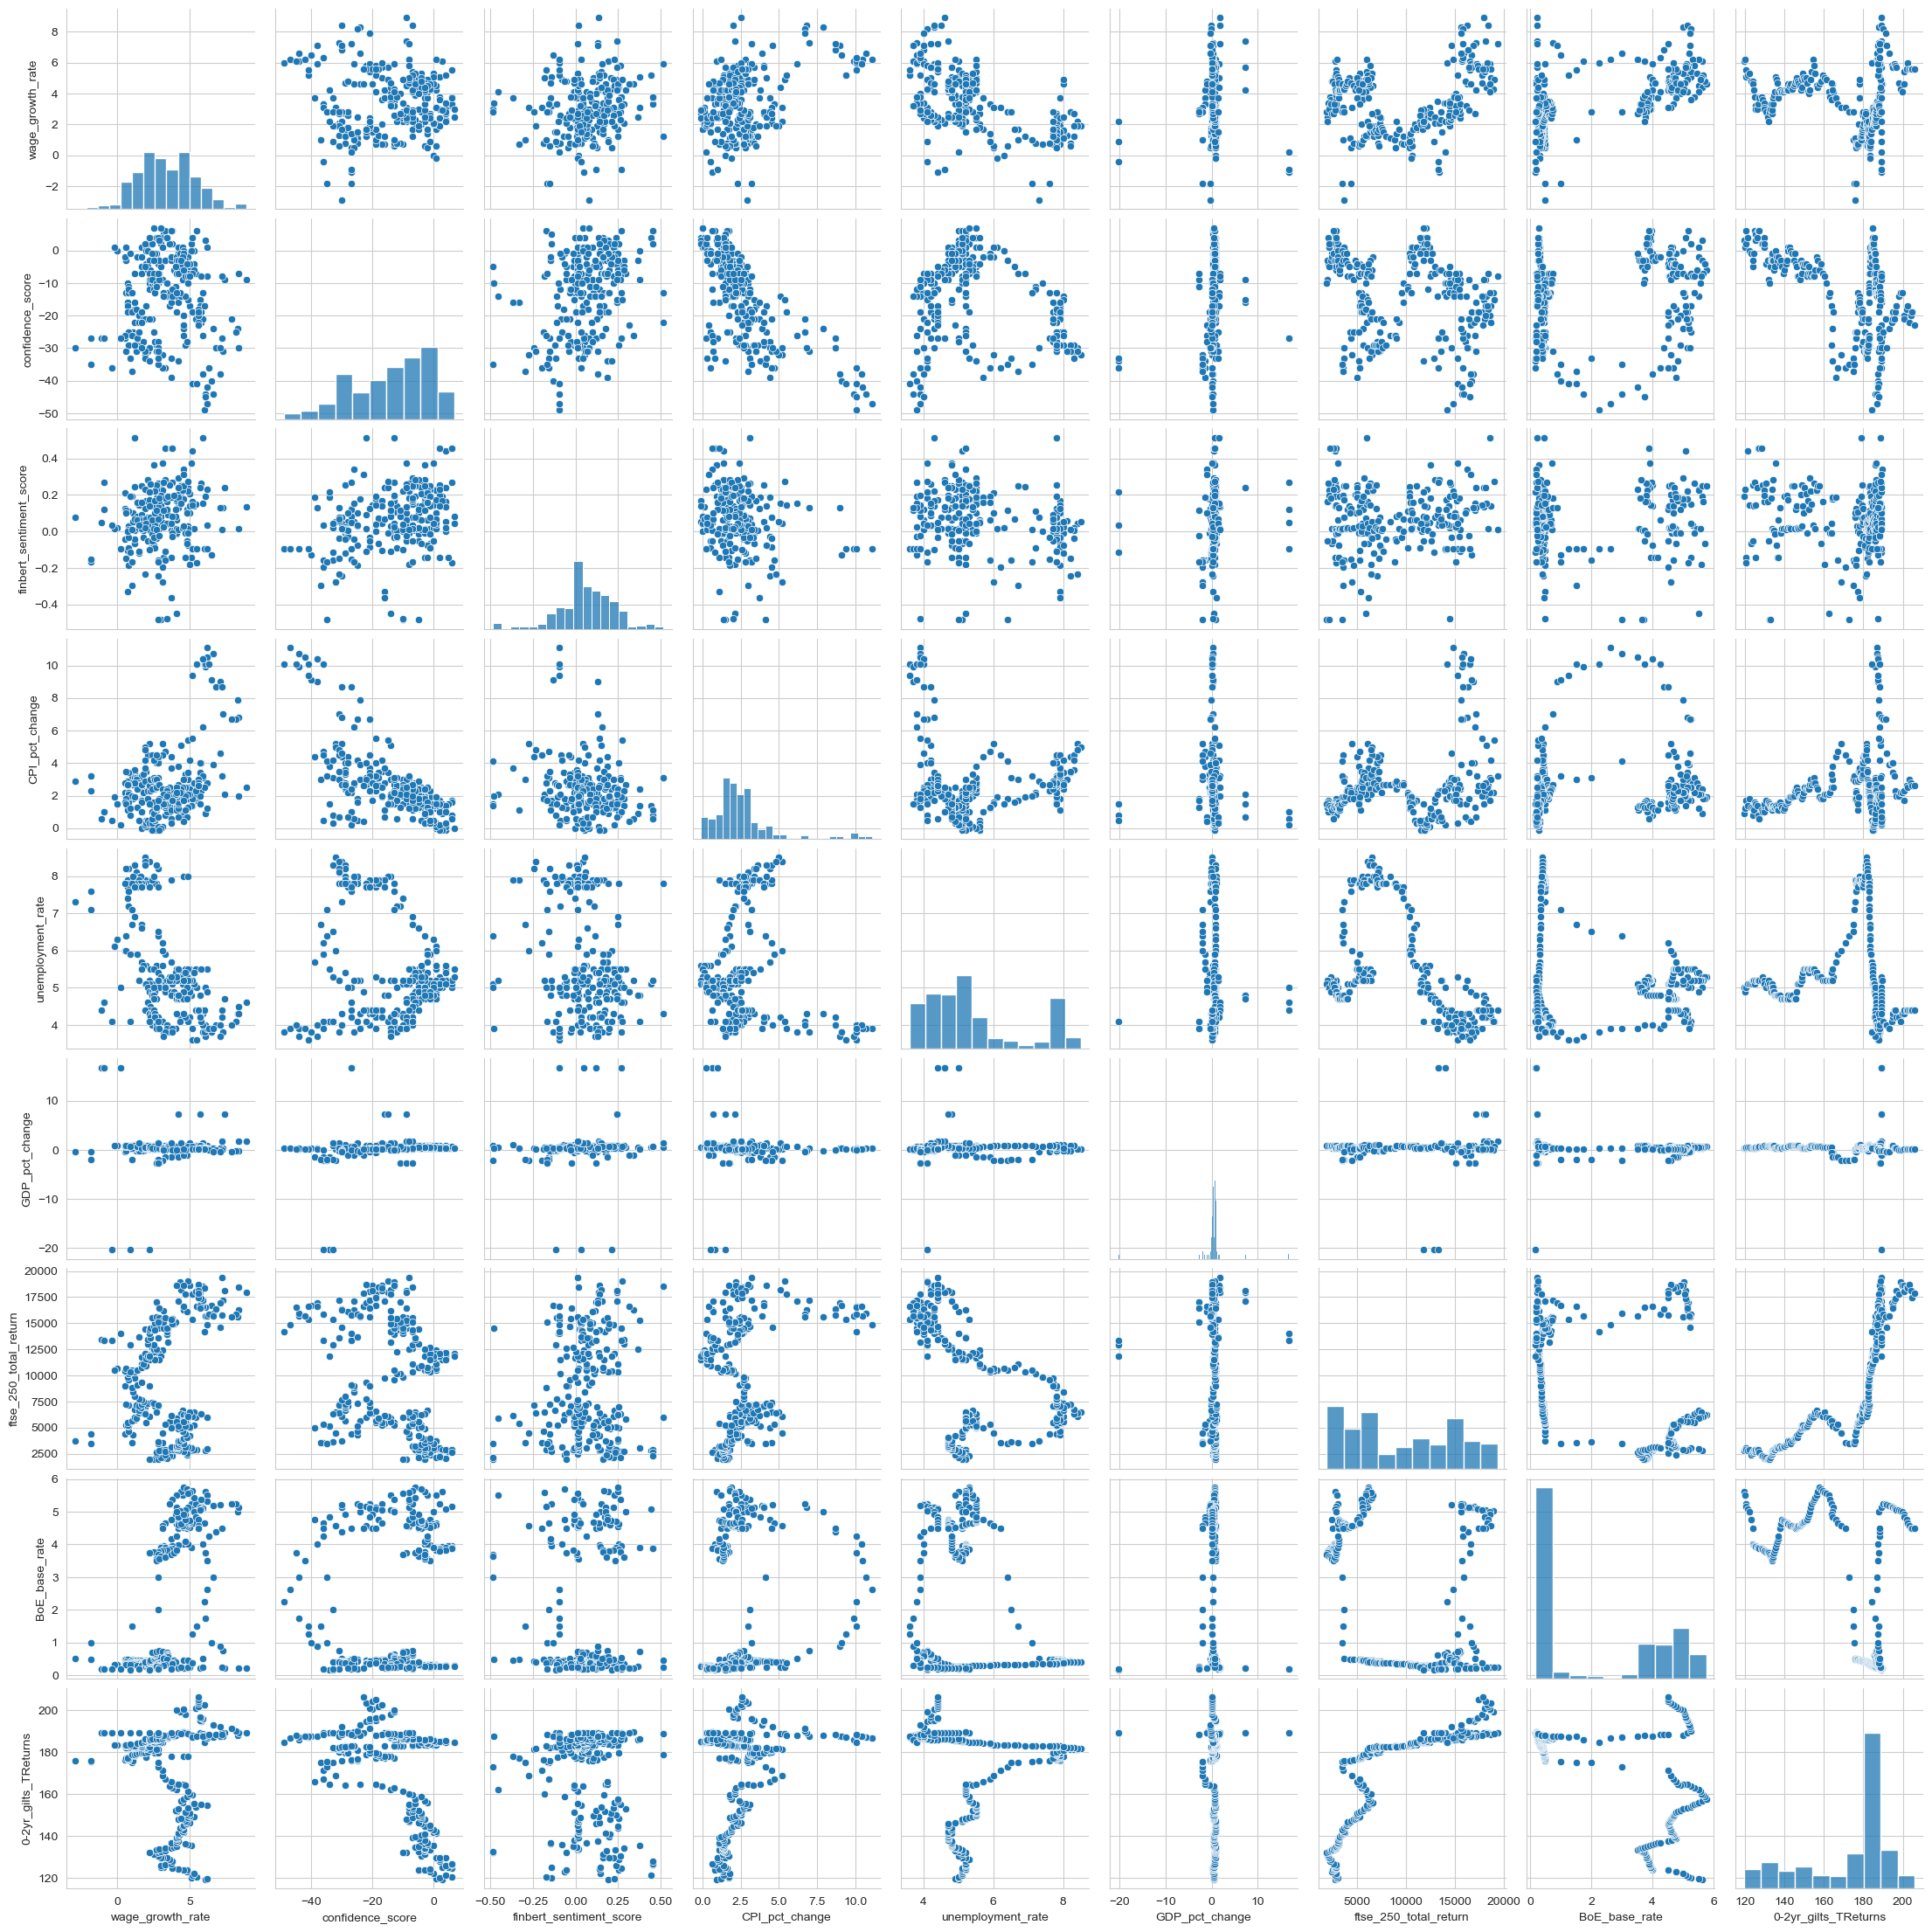

In [14]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

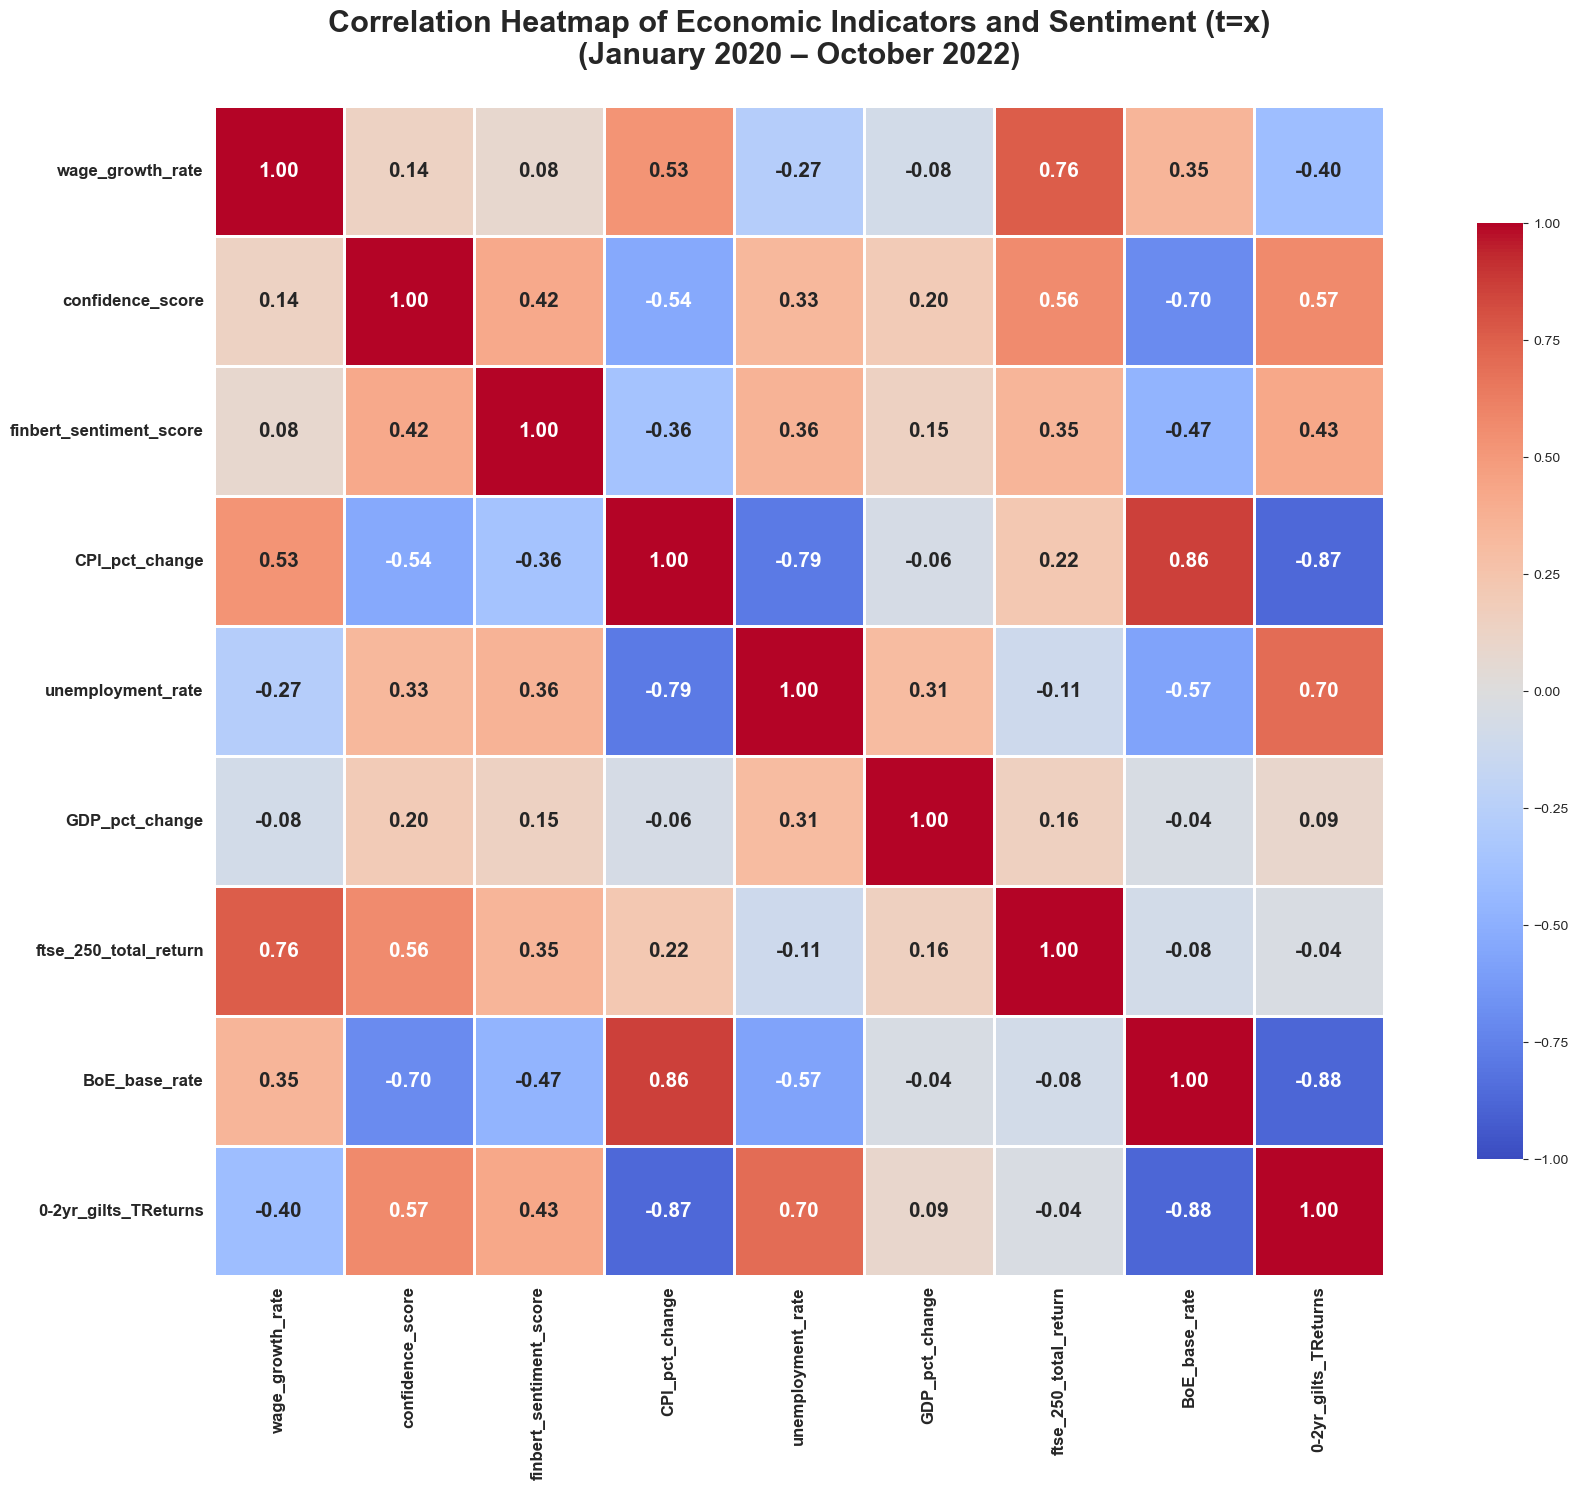

In [16]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

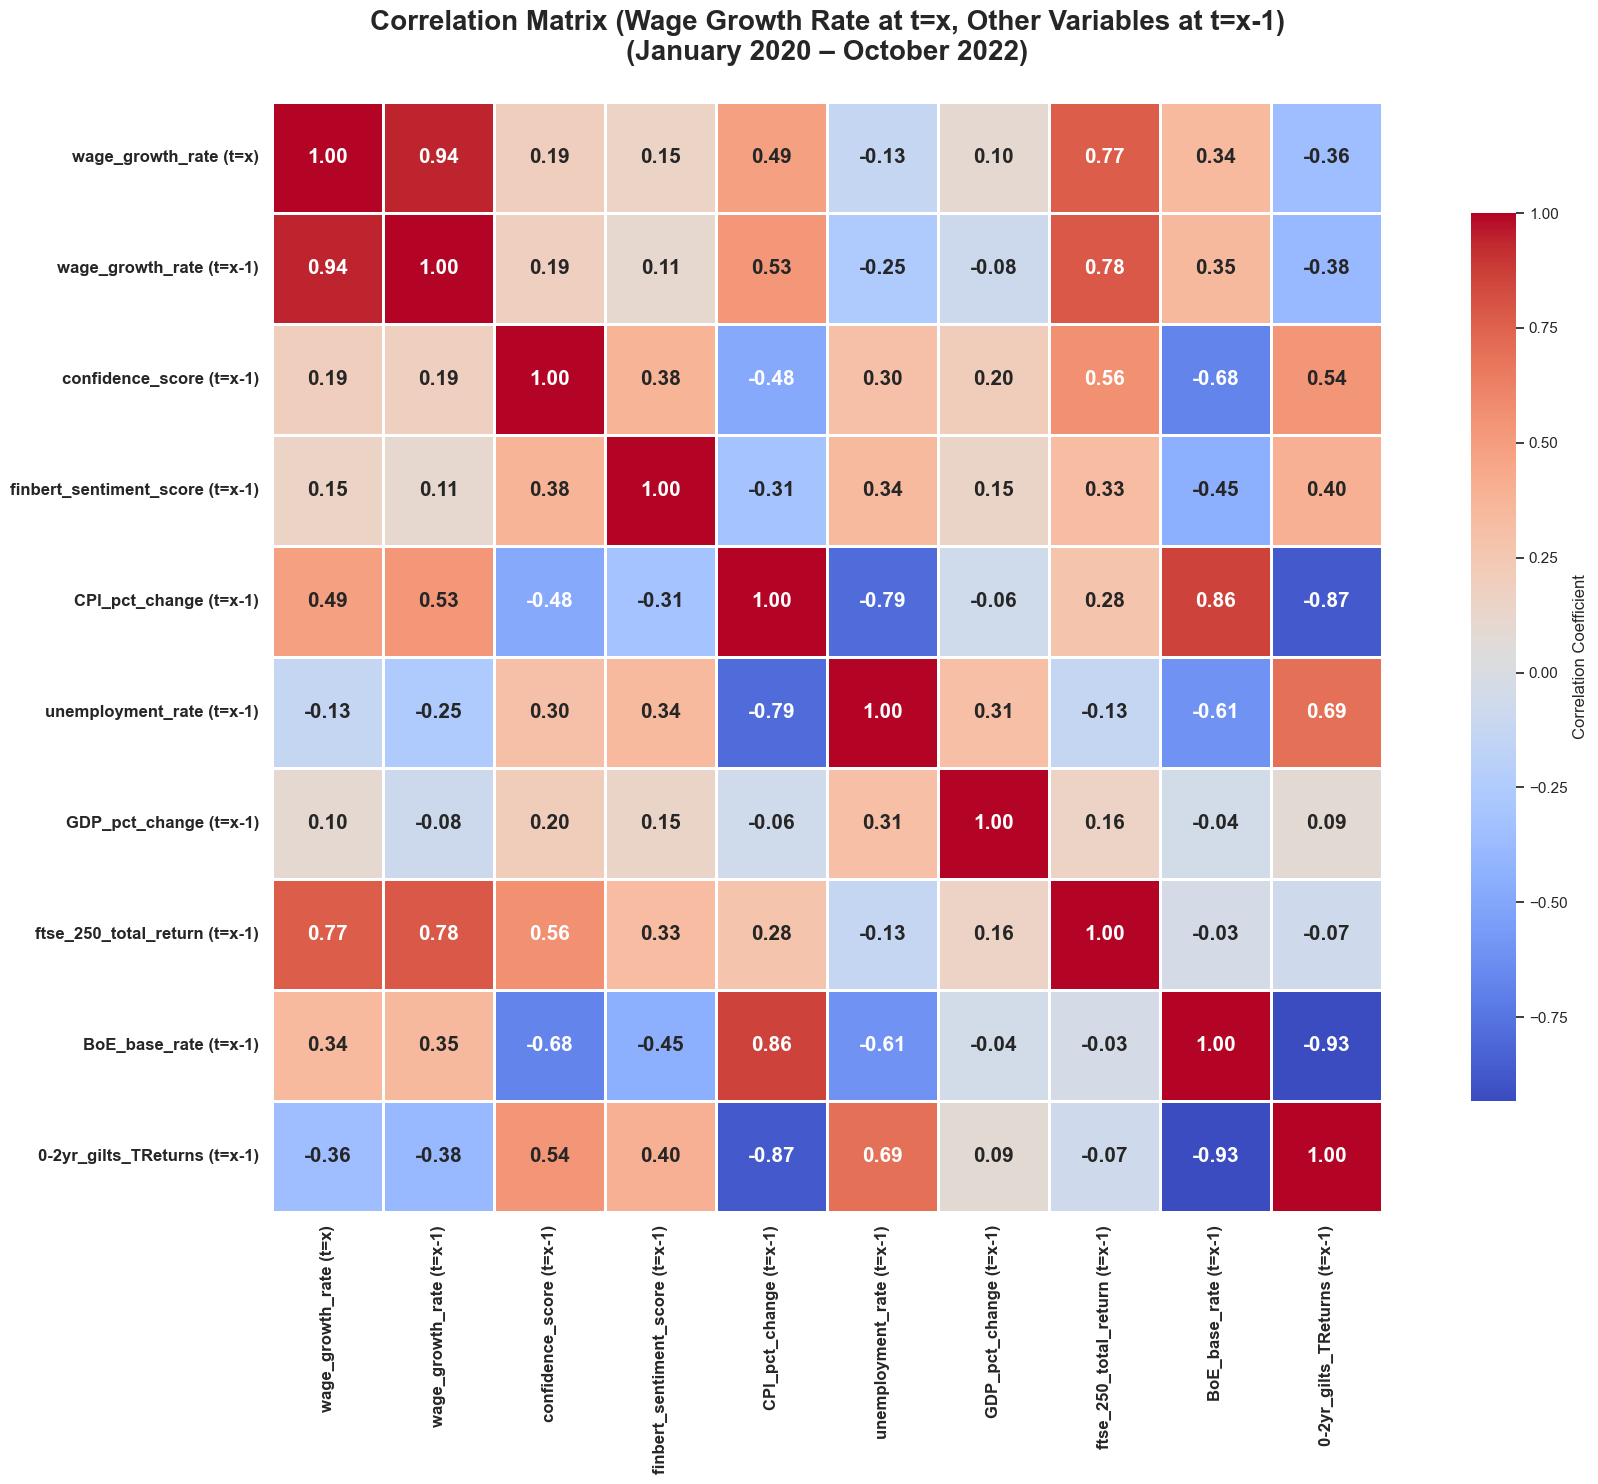

In [17]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

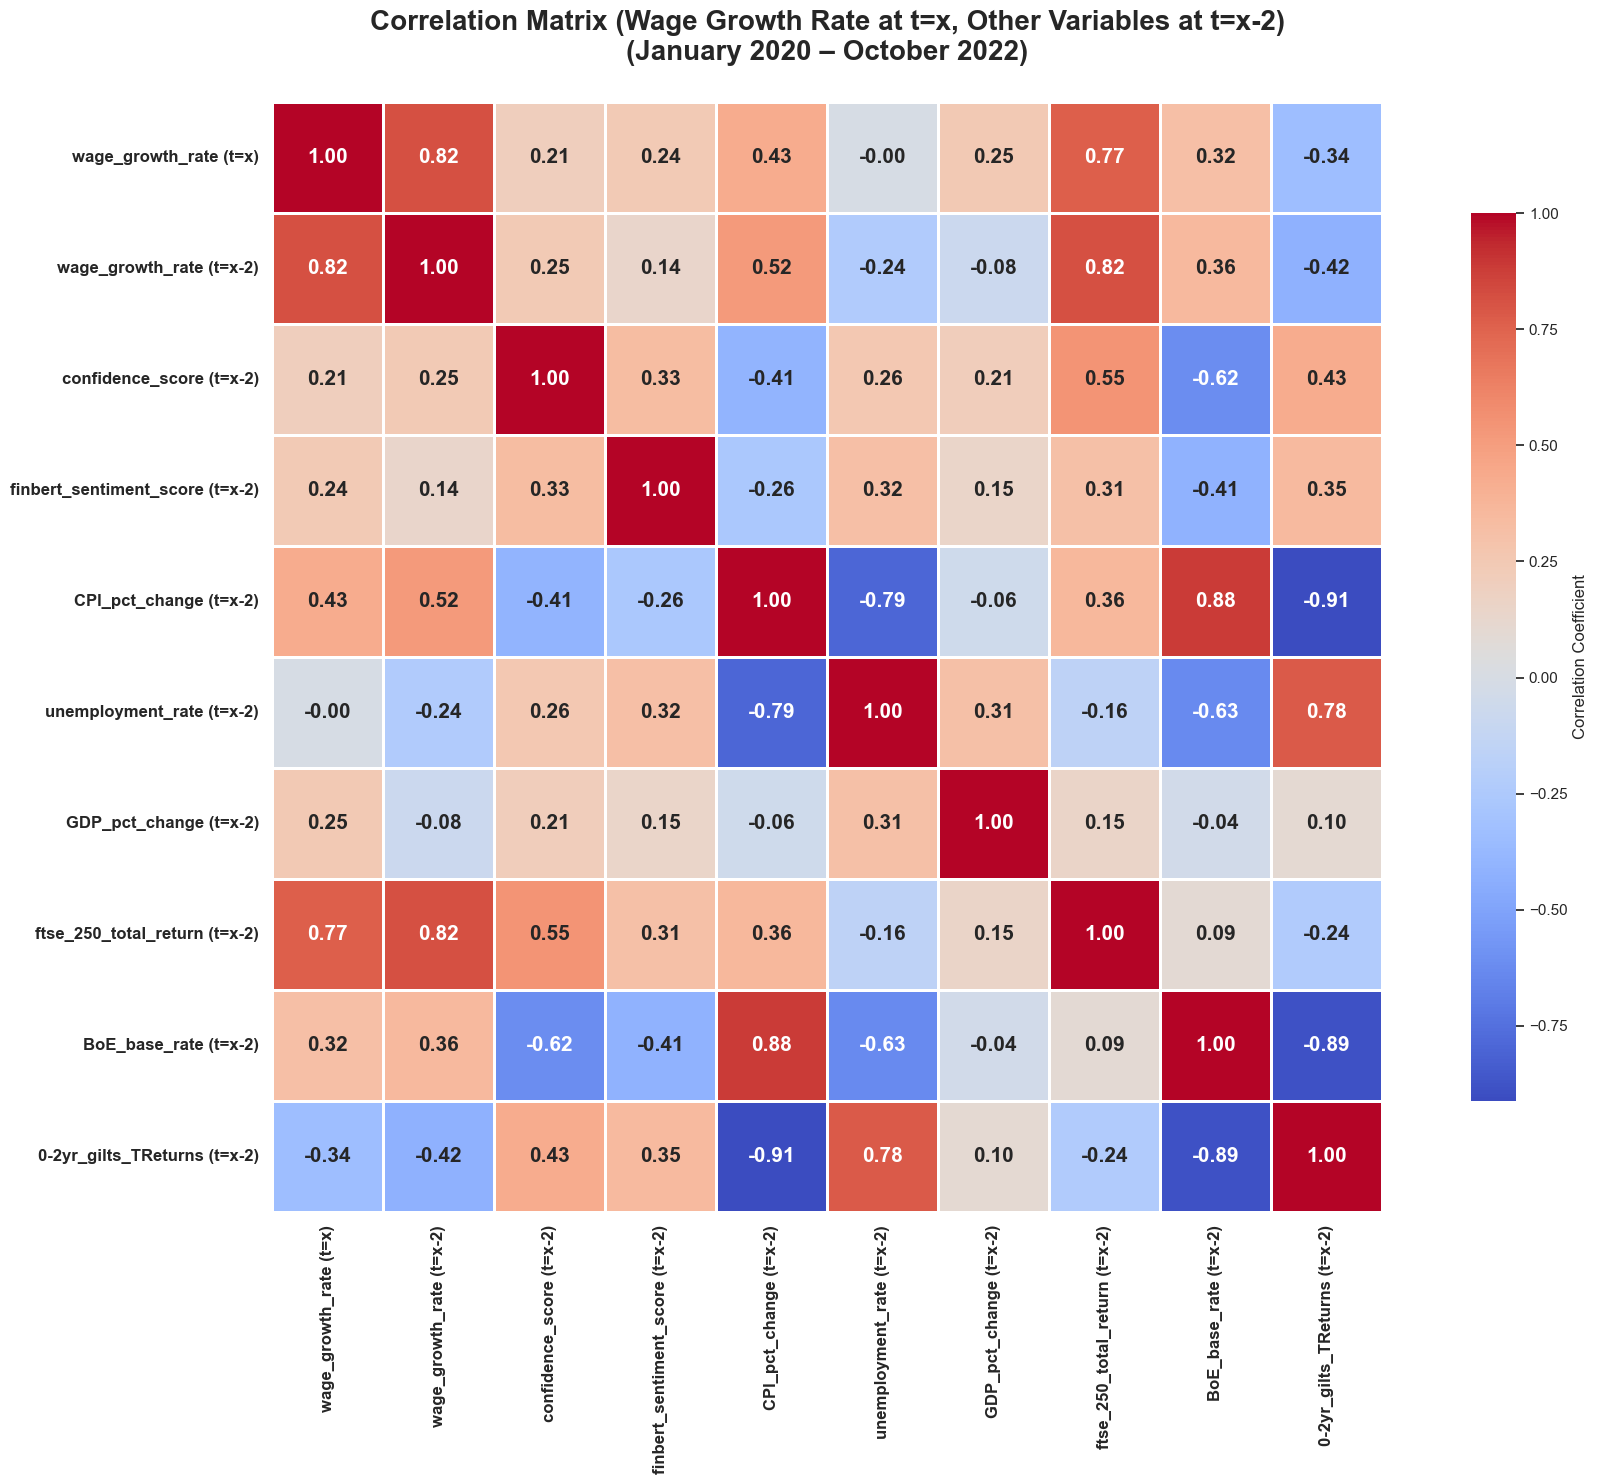

In [18]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 2 month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

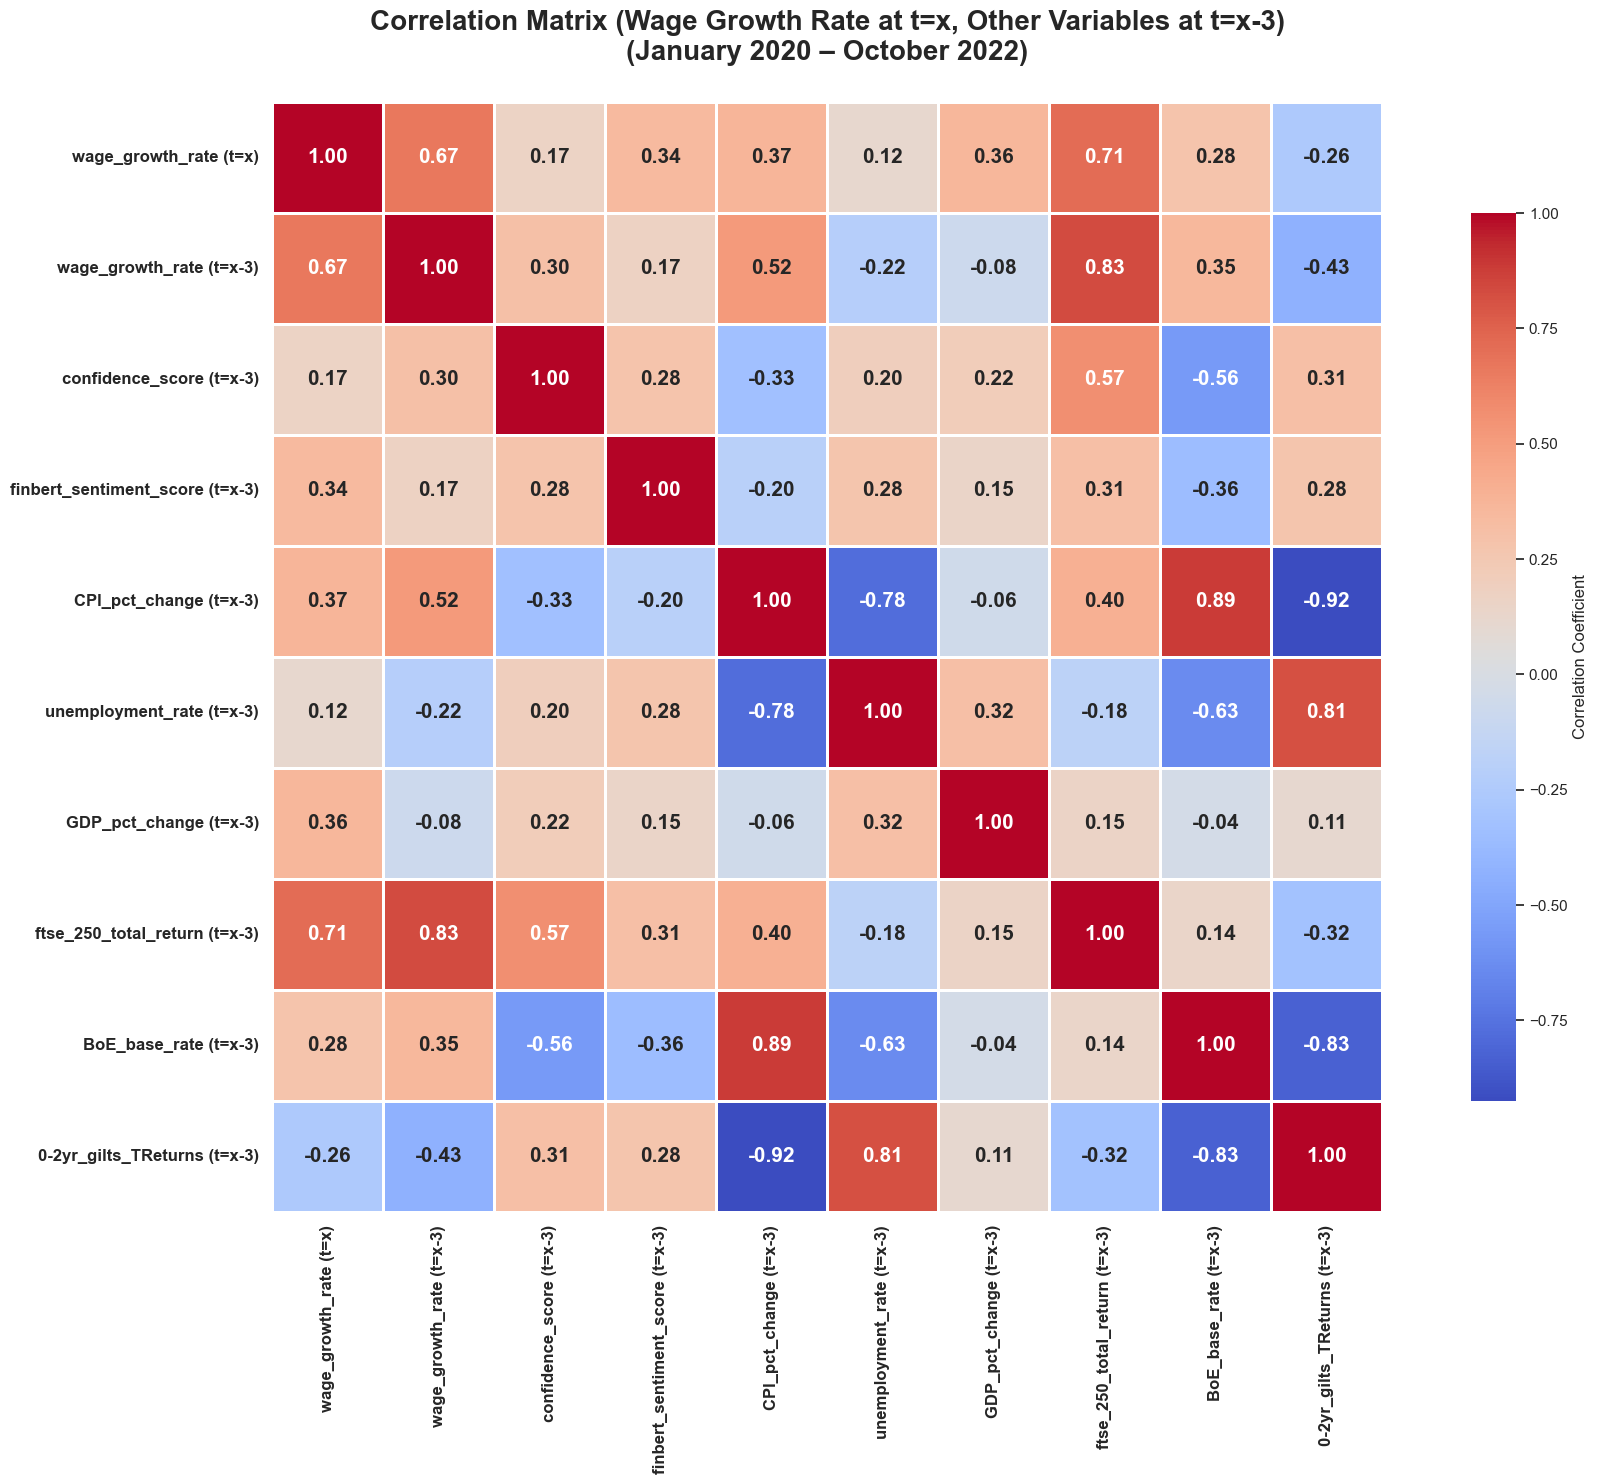

In [19]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Based on the correlation results, 0–2 year gilts total returns, BoE base rate, and unemployment rate were selected for further analysis. These variables consistently show the strongest relationships with the wage growth rate, particularly at current and recent time lags. The BoE base rate shows a strong positive correlation at t=0, unemployment rate has a notable negative correlation at both t=x and t=x-1, and 0–2 year gilts show moderate negative associations, suggesting meaningful influence on wage dynamics.

In [40]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['wage_growth_rate (t=x)'] = filtered_df['wage_growth_rate']
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return'].shift(1)
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,wage_growth_rate (t=x),wage_growth_rate (t=x-1),ftse_250_total_return (t=x-1),CPI_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1)
wage_growth_rate (t=x),1.000000,0.944268,0.773423,0.486513,0.336171,0.194096
wage_growth_rate (t=x-1),0.944268,1.000000,0.783473,0.525684,0.348060,0.186887
ftse_250_total_return (t=x-1),0.773423,0.783473,1.000000,0.279545,-0.027508,0.562328
CPI_pct_change (t=x-1),0.486513,0.525684,0.279545,1.000000,0.862602,-0.482594
BoE_base_rate (t=x-1),0.336171,0.348060,-0.027508,0.862602,1.000000,-0.675351
confidence_score (t=x-1),0.194096,0.186887,0.562328,-0.482594,-0.675351,1.000000


In [42]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)','ftse_250_total_return (t=x-1)', 'CPI_pct_change (t=x-1)',
     'confidence_score (t=x-1)', 'BoE_base_rate (t=x-1)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: -3.8900704562528245
Coefficients:
wage_growth_rate (t=x-1)         0.815881
ftse_250_total_return (t=x-1)    0.000286
CPI_pct_change (t=x-1)          -0.152944
confidence_score (t=x-1)        -0.008706
BoE_base_rate (t=x-1)            1.057707
dtype: float64


In [44]:
LinearRegression()

LinearRegression()

In [46]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 3.24910136,  2.73181485,  1.53726938,  0.89019226,  0.0407557 ,
       -0.5972521 , -0.52959087, -0.52959087,  0.70092966,  1.60156454,
        2.66959876,  3.97584233,  4.8741319 ,  4.98885273,  4.99056726,
        4.70602649,  6.04285199,  7.34227449,  8.44714531,  8.2409186 ,
        7.36841988,  6.1333427 ,  5.29398949,  4.51576712,  5.12132059,
        5.16242601,  5.62917346,  6.9878763 ,  6.62494736,  6.21469728,
        4.98235951,  5.74685836,  6.31044325,  6.33497492])

In [48]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))


R-squared:  0.9015883644996928
Intercept:  -3.8900704562528245
Coefficients:


[('wage_growth_rate (t=x-1)', 0.8158810950827422),
 ('ftse_250_total_return (t=x-1)', 0.00028638614075516557),
 ('CPI_pct_change (t=x-1)', -0.15294388418016738),
 ('confidence_score (t=x-1)', -0.008706198189396172),
 ('BoE_base_rate (t=x-1)', 1.0577074454168094)]

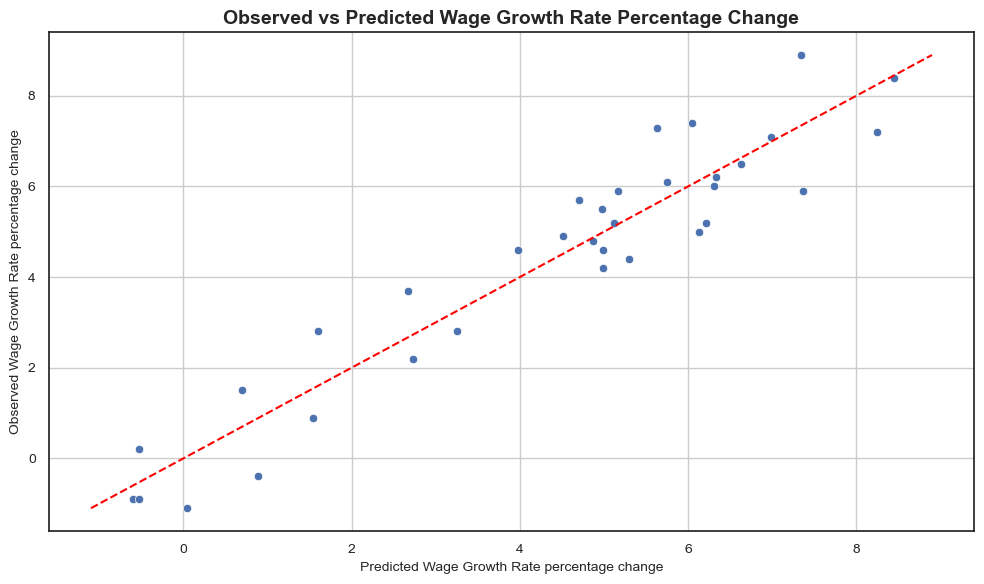

In [50]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate Percentage Change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### The observed vs. predicted plot shows that most points lie close to the red dashed line, indicating a good match between predicted and actual wage growth rates. This suggests that the model performs well in capturing the overall trend, though a few deviations highlight minor prediction errors.

### Training and testing subsets with MLR

In [54]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [56]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model) 

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.919
Model:                                OLS   Adj. R-squared:                  0.900
Method:                     Least Squares   F-statistic:                     47.54
Date:                    Mon, 19 May 2025   Prob (F-statistic):           9.54e-11
Time:                            12:58:39   Log-Likelihood:                -32.188
No. Observations:                      27   AIC:                             76.38
Df Residuals:                          21   BIC:                             84.15
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### The regression model has a strong fit, with an R-squared of 0.919, meaning it explains over 90% of the variation in wage growth. Wage growth rate (t=x-1) is the only statistically significant predictor (p < 0.001), while all other variables are not significant. The residual diagnostics, including the Durbin-Watson and Jarque-Bera tests, suggest no major issues with autocorrelation or non-normality. However, the very high condition number indicates potential multicollinearity or numerical instability that may need further investigation.

In [60]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [62]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 4.86722897  6.27036076  1.55320227  3.29623724 -0.23541843  6.11590641
  7.55187516 -0.81352925  4.97573536  3.88992306  2.85908977  1.46569672
  4.82293493  0.73337095  6.01570131  4.37882326  5.58767725  5.16925552
  8.73772367  5.05331307 -0.74304929  7.47857451  6.43700986 -0.74304929
  2.62041558  5.0118783   6.44311234]


In [64]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [4.7524135  8.52451767 6.9301295  5.51647033 0.54884078 4.95171115
 6.15440195]


In [66]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

67.40032272418834


#### The multiple linear regression model explains approximately 56.70% of the variance in the wage growth rate, based on the R-squared value. This indicates a moderate fit, suggesting that while the model captures some key relationships, a significant portion of the variation remains unexplained—potentially due to omitted variables or model limitations.

### Check for multicollinearity¶

In [70]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0       378.8                          const
1         4.1       wage_growth_rate (t=x-1)
2         6.1  ftse_250_total_return (t=x-1)
3         7.6         CPI_pct_change (t=x-1)
4         4.0       confidence_score (t=x-1)
5         7.9          BoE_base_rate (t=x-1)


#### The VIF results indicate moderate multicollinearity concerns. Several of the variables' VIF factor exceed the common threshold of 5, suggesting high multicollinearity. The intercept (const) has an extremely high VIF, which is expected and not problematic. Overall, multicollinearity should be addressed, particularly for the CPI and BoE variables.

### Check normality of regression residuals - assumption of MLR

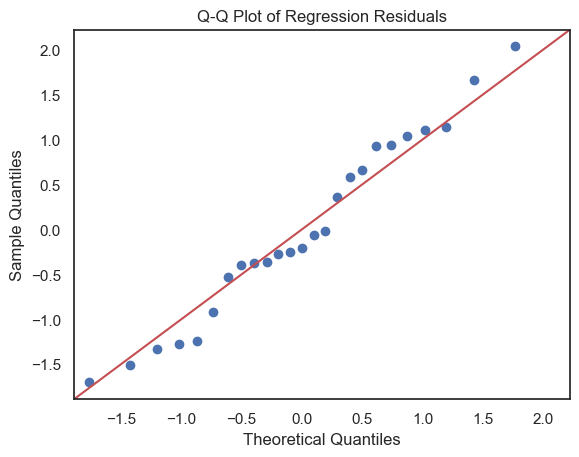

In [106]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that the residuals closely follow the diagonal line, indicating that they are approximately normally distributed. This supports the assumption of normality in the regression model.

### Evaluate the model

In [74]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.9399077647621867
Mean Square Error (Final): 1.1658709073093259


#### The model shows moderate prediction accuracy, with a Mean Absolute Error (MAE) of 0.94 and a Mean Squared Error (MSE) of 1.17. This suggests that, on average, the predicted wage growth values are reasonably close to the actual values, though some larger errors may be present.

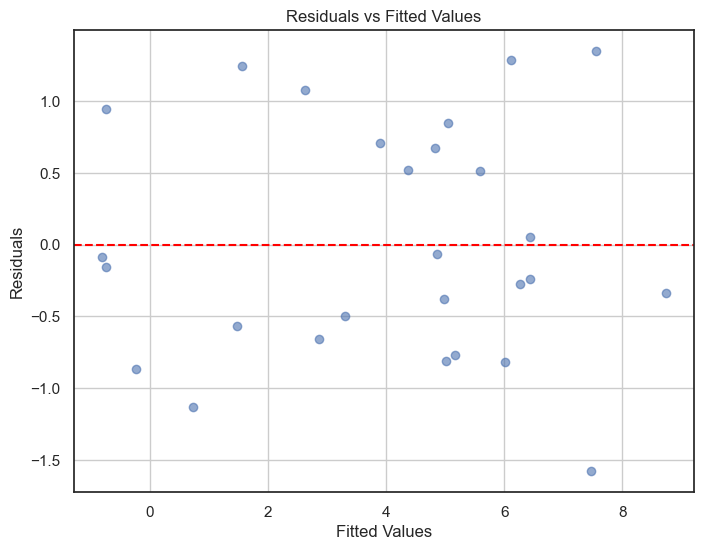

In [78]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


#### The residuals vs. fitted values plot shows a fairly random scatter around the zero line, which supports the assumptions of linearity and homoskedasticity. However, the spread of residuals appears uneven, suggesting possible mild heteroskedasticity or variability in model accuracy across different predicted values.

#### Multiple linear regression: Drop CPI, and BoE bank rate as variables and explore transformation of dependent variable

### Re-perform MLR

In [113]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)'
]
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [115]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 3.06803694,  2.97329458,  2.40484041,  1.17318971, -0.05846099,
       -0.72165752, -0.5321728 , -0.5321728 ,  0.50999318,  1.74164388,
        2.97329458,  3.82597583,  4.67865709,  4.86814181,  4.67865709,
        4.29968764,  5.72082307,  7.33144321,  8.75257864,  8.27886683,
        7.14195849,  5.91030779,  5.05762654,  4.48917237,  4.96288417,
        5.24711126,  5.91030779,  7.23670085,  7.04721613,  6.47876196,
        5.24711126,  5.53133834,  6.09979251,  6.00505015])

In [117]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

R-squared:  0.8916425082159116
Intercept:  0.3205084554745561
Coefficients:


[('wage_growth_rate (t=x-1)', 0.9474236160129071)]

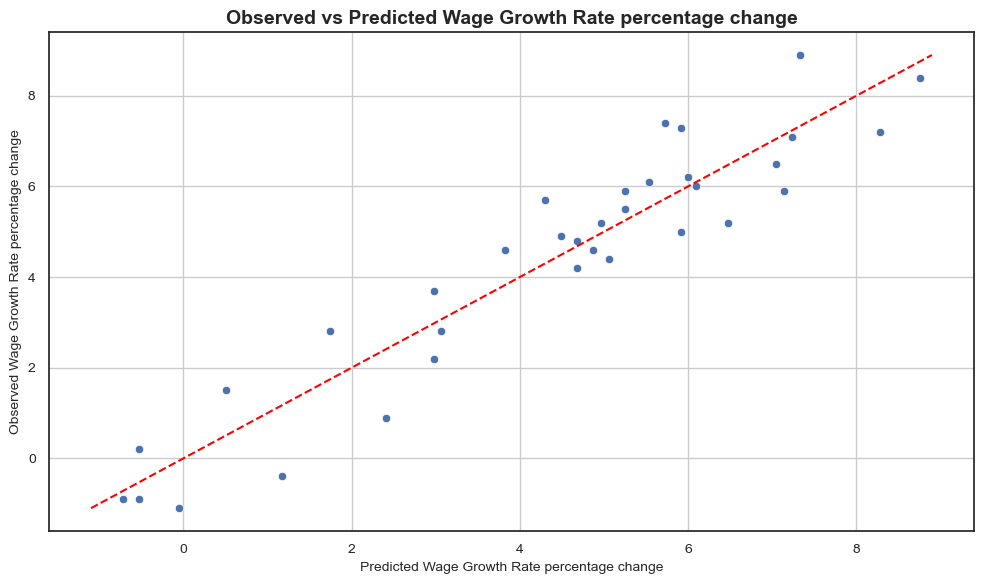

In [119]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR


In [122]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [124]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.907
Model:                                OLS   Adj. R-squared:                  0.903
Method:                     Least Squares   F-statistic:                     243.4
Date:                    Mon, 19 May 2025   Prob (F-statistic):           2.15e-14
Time:                            13:01:45   Log-Likelihood:                -34.045
No. Observations:                      27   AIC:                             72.09
Df Residuals:                          25   BIC:                             74.68
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [126]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         3.2                     const
1         1.0  wage_growth_rate (t=x-1)


In [128]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [130]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 0.13074135978506374, 'LM Test p-value': 0.7176646067927577, 'F-stat': 0.1216458570142544, 'F-test p-value': 0.73017657460826}


#### The regression model shows a very strong fit with an R-squared of 0.907, meaning it explains over 90% of the variation in wage growth. Wage growth rate (t=x-1) is highly significant (p < 0.001). No multicollinearity concerns. The Breusch-Pagan test p-values (LM: 0.71, F: 0.73) suggest no evidence of heteroskedasticity. Overall, the model is statistically sound and well-behaved.

In [133]:
regression_df.describe()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),ftse_250_total_return (t=x-1),CPI_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1)
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2021-05-22 08:28:14.117647104,4.347059,4.250000,16069.077476,3.482353,0.457502,-24.852941
min,2020-02-01 00:00:00,-1.100000,-1.100000,11804.718280,0.200000,0.175000,-49.000000
25%,2020-09-08 12:00:00,2.800000,2.800000,14077.255270,0.700000,0.200893,-33.000000
50%,2021-05-16 12:00:00,4.950000,4.850000,16536.663775,1.900000,0.226786,-26.500000
75%,2022-01-24 06:00:00,6.075000,5.975000,17898.384287,5.475000,0.343750,-15.000000
max,2022-10-01 00:00:00,8.900000,8.900000,19395.493530,10.100000,2.250000,-7.000000
std,NaN,2.750122,2.740963,2072.370586,3.407431,0.512804,11.840179


In [135]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 365 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           34 non-null     datetime64[ns]
 1   wage_growth_rate (t=x)         34 non-null     float64       
 2   wage_growth_rate (t=x-1)       34 non-null     float64       
 3   ftse_250_total_return (t=x-1)  34 non-null     float64       
 4   CPI_pct_change (t=x-1)         34 non-null     float64       
 5   BoE_base_rate (t=x-1)          34 non-null     float64       
 6   confidence_score (t=x-1)       34 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.1 KB


In [137]:
regression_df.head()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),ftse_250_total_return (t=x-1),CPI_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1)
365,2020-02-01,2.8,2.9,16484.53341,1.8,0.235526,-9.0
366,2020-03-01,2.2,2.8,15082.33282,1.7,0.205263,-7.0
367,2020-04-01,0.9,2.2,11804.71828,1.5,0.175000,-34.0
368,2020-05-01,-0.4,0.9,12892.18801,0.8,0.178571,-33.0
369,2020-06-01,-1.1,-0.4,13365.07954,0.5,0.182143,-36.0


Root Mean Squared Error: 1.0561
Mean Squared Error: 1.1154
Mean Absolute Error: 0.8811
R² Score: 0.6773


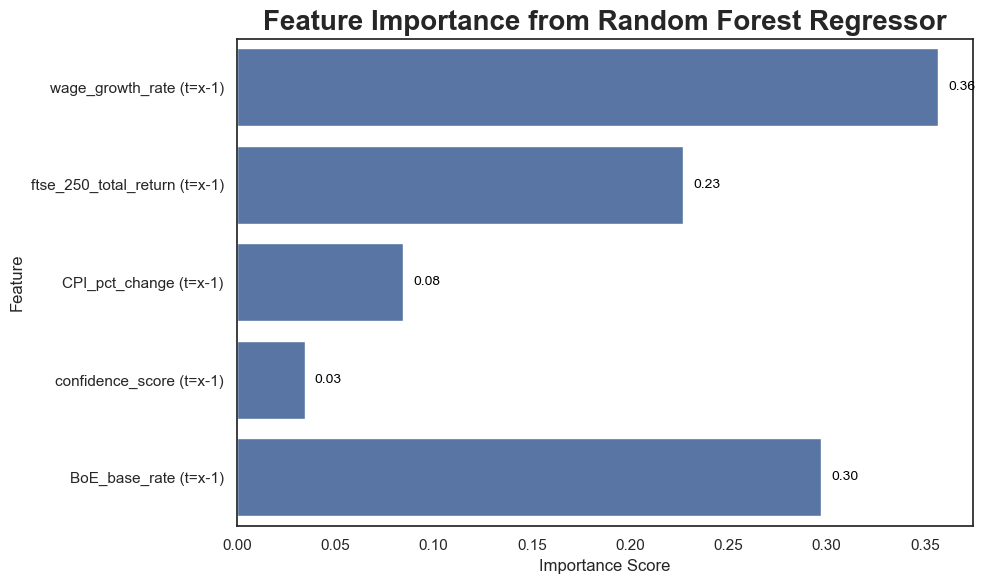

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas


# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','ftse_250_total_return (t=x-1)', 'CPI_pct_change (t=x-1)',
     'confidence_score (t=x-1)', 'BoE_base_rate (t=x-1)'

])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','ftse_250_total_return (t=x-1)', 'CPI_pct_change (t=x-1)',
     'confidence_score (t=x-1)', 'BoE_base_rate (t=x-1)'

    ]
]
y = regression_df['wage_growth_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 1.1719
Mean Squared Error: 1.3734
Mean Absolute Error: 0.9681
R² Score: 0.6027


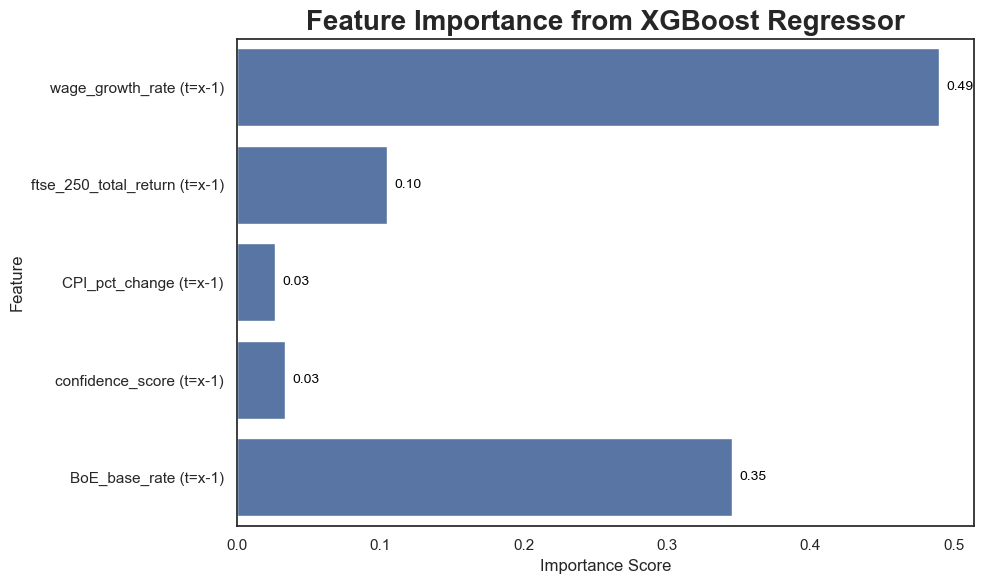

In [151]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','ftse_250_total_return (t=x-1)', 'CPI_pct_change (t=x-1)',
     'confidence_score (t=x-1)', 'BoE_base_rate (t=x-1)'

])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','ftse_250_total_return (t=x-1)', 'CPI_pct_change (t=x-1)',
     'confidence_score (t=x-1)', 'BoE_base_rate (t=x-1)'

    ]
]
y = regression_df['wage_growth_rate (t=x)']
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

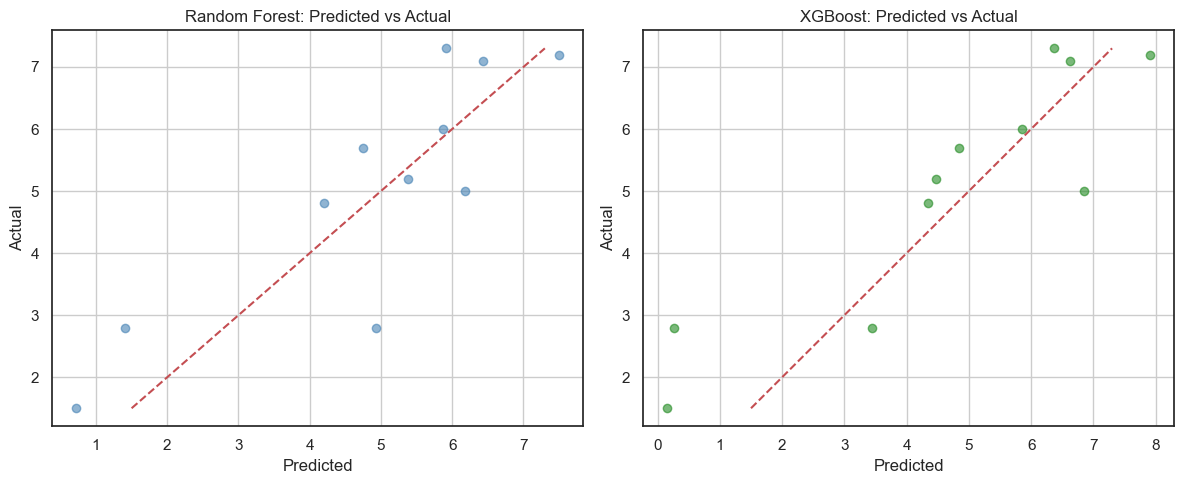

In [145]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both the Random Forest and XGBoost models show moderate performance in predicting wage growth, with R² scores of 0.6773 and 0.6027, respectively. In terms of feature importance, wage growth rate (t=x-1) is the dominant predictor in both models, contributing 36% in Random Forest and an even higher 49% in XGBoost. The next most important features are BoE base rate and  FTSE 250 total return. 

#### The predicted vs. actual plots indicate that Random Forest captures the relationship slightly better, with predictions closer to the diagonal line, while XGBoost shows greater deviation. Overall, Random Forest provides more accurate and balanced results in this case.